## How to support string conversion in your python class?

In [3]:
dir(object)  # shows the names in object's namespace. object is a class

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [4]:
obj = object()

In [5]:
obj.__str__()  # calls object.__repr__()

'<object object at 0x7f96d76b8230>'

In [6]:
obj.__repr__()

'<object object at 0x7f96d76b8230>'

Any class via inheritance chain ultimately inherits from **object** class.

In [7]:
class Car:  # implicitly inherits from object; class Car(object)
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage
    # note that no implementation is provided for __str__ and __repr__ methods

In [10]:
car = Car('red', 35000)

In [11]:
car # give me the formal string representation of the object; invokes repr(car)

In [14]:
# gimme the informal string representation of the object; invokes str(car)
print(car)  # str(car) calling car.__str__() calling obj.__str__() which invokes obj.__repr__()

## Your class : \__str__ implemented, \__repr__ not

In [22]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

    def __str__(self):
        return f'a {self.color} car'

When you try printing or inspecting a Car instance now, you’ll get a different, slightly improved result:

In [23]:
my_car = Car('red', 37281)

In [24]:
print(my_car)  # calls __str__()

a red car


In [25]:
my_car  # calls __repr__()

Inspecting the car object in the console still gives us the previous result containing the object’s id. But printing the object resulted in the string returned by the \__str__ method we added.

\__str__ is one of Python’s “dunder” (double-underscore) methods and gets called when you try to convert an object into a string through the various means that are available:

In [26]:
print(my_car)  # calls __str__(); print the contents of what dunder str() returns into stdout

a red car


In [27]:
str(my_car)    # calls __str__(); what dunder str() returns

'a red car'

In [28]:
'{}'.format(my_car)  # calls __str__(); {} replaced with the contents of dunder str()

'a red car'

In [29]:
f'{my_car}'  # calls __str__(); {my_car} is replaced with the contents of dunder str()

'a red car'

## Python’s \__repr__ vs \__str__: What Is the Difference Between Them?

Now, our string conversion story doesn’t end there. Did you see how inspecting my_car in an interpreter session still gave that odd <Car object at ...> result?

This happened because there are actually two dunder methods that control how objects are converted to strings in Python 3. The first one is \__str__, and you just learned about it. The second one is \__repr__, and the way it works is similar to \__str__, but it is used in different situations.

Here’s a simple experiment you can use to get a feel for when \__str__ or \__repr__ is used. Let’s redefine our car class so it contains both to-string dunder methods with outputs that are easy to distinguish:

In [30]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

    def __repr__(self):
        return '__repr__ for Car'

    def __str__(self):
        return '__str__ for Car'

Now, when you play through the previous examples:

In [31]:
my_car2 = Car('red', 37281)

In [32]:
print(my_car2) # calls __str__()

__str__ for Car


In [33]:
'{}'.format(my_car2)  # calls __str__()

'__str__ for Car'

In [34]:
str(my_car2)  # calls __str__()

'__str__ for Car'

In [35]:
f'{my_car2}'  # calls __str__()

'__str__ for Car'

In [36]:
my_car2   # calls repr(my_car2) -> __repr__()

__repr__ for Car

Containers like lists and dicts always use the result of \__repr__ to represent the objects they contain. Even if you call str on the container itself:

In [37]:
str([my_car2])

'[__repr__ for Car]'

To manually choose between both string conversion methods, for example, to express your code’s intent more clearly, it’s best to use the built-in **str()** and **repr()** functions. Using them is preferable over calling the object’s **\__str__** or **\__repr__** directly, as it looks nicer and gives the same result:

In [38]:
str(my_car2)  # calls __str__()

'__str__ for Car'

In [39]:
repr(my_car)  # calls __repr__()

'<__main__.Car object at 0x7fe3b42717d0>'

Even with this investigation complete, you might be wondering what the “real-world” difference is between **\__str__** and **\__repr__**. They both seem to serve the same purpose, so it might be unclear when to use each.

With questions like that, it’s usually a good idea to look into what the Python standard library does. Time to devise another experiment. We’ll create a datetime.date object and find out how it uses **\__repr__** and **\__str__** to control string conversion:

In [40]:
import datetime
today = datetime.date.today()

## The result of an object’s \__str__ function should primarily be readable

It’s meant to return a concise textual representation for human consumption—something you’d feel comfortable displaying to a user.

In [41]:
str(today)

'2020-05-15'

## With \__repr__, the idea is that its result should be, above all, unambiguous

Referring back to official Python documentation:

In [44]:
repr(today)  # calls datetime.__repr__()

'datetime.date(2020, 5, 15)'

In [47]:
import datetime
today2 = eval('datetime.date(2020, 5, 15)')
repr(today2)

'datetime.date(2020, 5, 15)'

We could copy and paste the string returned by **\__repr__** and execute it as valid Python to recreate the original date object. This is a neat approach and a good goal to keep in mind while writing your own reprs.

Example:

In [3]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

    def __repr__(self):
        return '__repr__ for Car'

my_car2 = Car('red', 37281) 
str(my_car2)

'__repr__ for Car'

## Why Every Python Class Needs a \__repr__

If you don’t add a **\__str__** method, Python falls back on the result of **\__repr__** when looking for **\__str__**. Therefore, I recommend that you always add at least a **\__repr__** method to your classes. This will guarantee a useful string conversion result in almost all cases, with a minimum of implementation work.

Here’s how to add basic string conversion support to your classes quickly and efficiently. 
For our Car class we might start with the following **\__repr__**:

In [ ]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

    def __repr__(self):
        return f'Car({self.color!r}, {self.mileage!r})'

This works nicely, but one downside is that we’ve repeated the class name inside the format string. A trick you can use here to avoid this repetition is to use the object’s **\__class__.__name__** attribute, which will always reflect the class’ name as a string.

The benefit is you won’t have to modify the **\__repr__** implementation when the class name changes. This makes it easy to adhere to the Don’t Repeat Yourself (DRY) principle:

In [14]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

    def __repr__(self):
        return f'{self.__class__.__name__}({self.color!r}, {self.mileage!r})'

In [15]:
my_car3 = Car('red', 37281)

In [16]:
my_car3

Car('red', 37281)

In [17]:
print(my_car3)

Car('red', 37281)


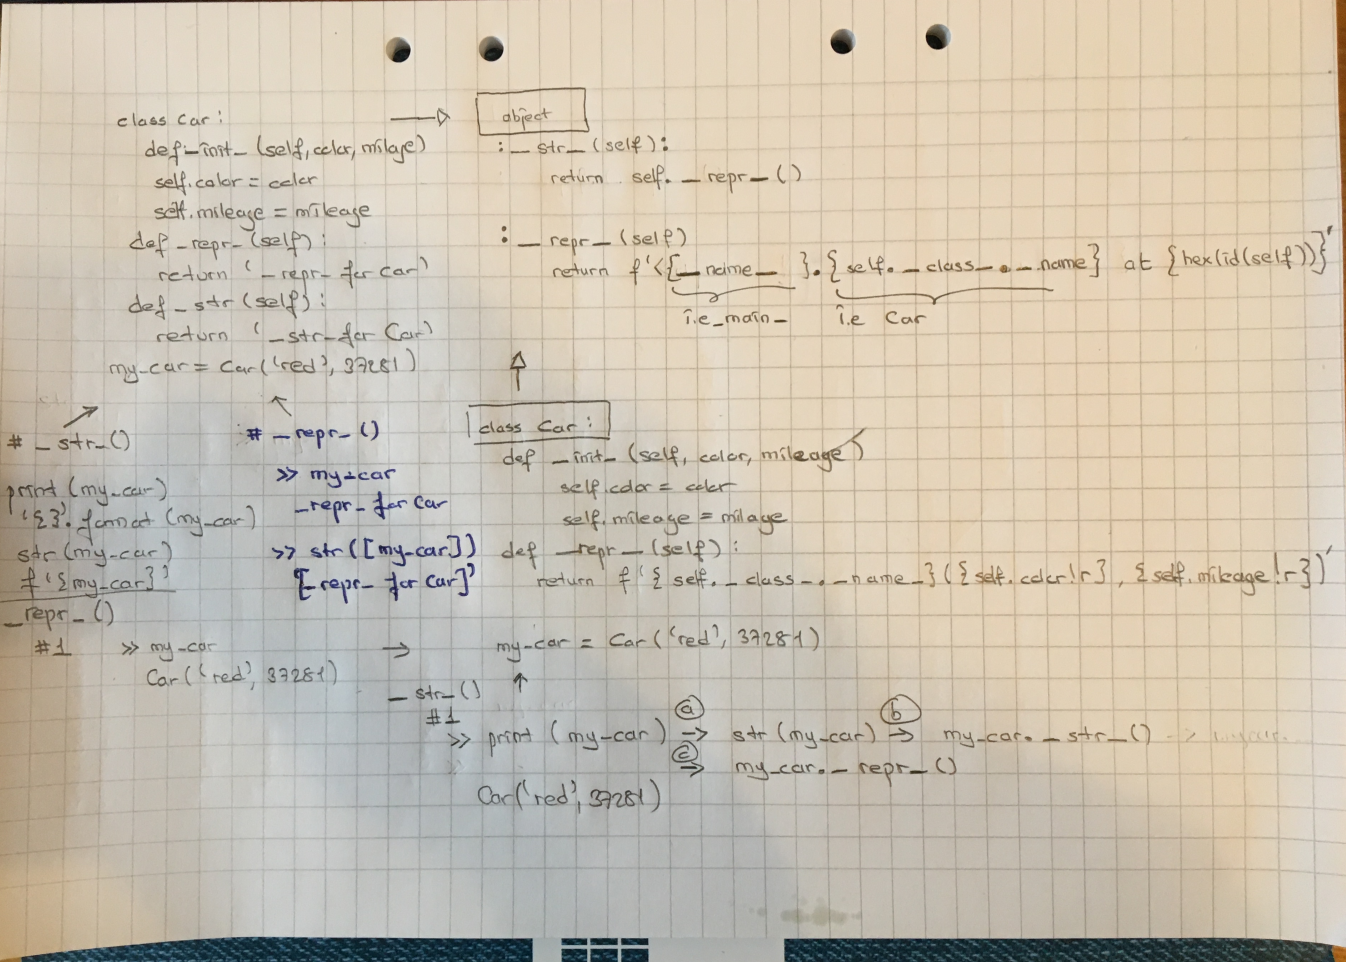

## REFERENCES:

[1] https://dbader.org/blog/python-repr-vs-str

[2] https://docs.python.org/3.6/reference/datamodel.html#object.__repr__   (object.\_\_repr__ documentation)

[3] https://docs.python.org/3.6/reference/datamodel.html#object.__str__  (object.\_\_str__ documentation)

[4] https://stackoverflow.com/questions/1436703/difference-between-str-and-repr